In [18]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL2/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#########################################

In [19]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

import xarray as xr
import pandas as pd
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

In [20]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
runid	= 'Arc12'

data_path  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [21]:
ind_all = np.load('index_all.npy')
ind_all

array([191974, 191973, 191975, ..., 711906, 711930, 711931])

In [22]:
tracername = 'WAPE'
time = pd.date_range('1985-01-01', freq="YS", periods= len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*monthly.nc', concat_dim='time')
data['time'] = time

APE_sel = data.APE.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
APE_sel = APE_sel.compute()
APE_sel = APE_sel.fillna(0)
# CUR_march = CUR_sel[data['time.month']==3]
# CUR_march = CUR_march.compute()

APE_sept_mean = APE_sel.mean(dim='time')
APE_sept_mean = APE_sept_mean.compute()

pff = np.polyfit(years, APE_sel, 1)
APE_trend = pff[0]

ind_fram = (np.array(np.abs(mesh.x2)<90) & np.array(mesh.y2<80))
APE_trend[ind_fram]=np.nan
APE_sept_mean[ind_fram]=np.nan

In [23]:
tracername = 'MLD2'
time = pd.date_range('1985-01-01', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = time

MLD_sel = data.MLD.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
MLD_sel = MLD_sel.compute()

# CUR_march = CUR_sel[data['time.month']==3]
# CUR_march = CUR_march.compute()

MLD_sept = MLD_sel[data['time.month']==2]
MLD_sept = MLD_sept.compute()
MLD_sept_mean = MLD_sept.mean(dim='time')
MLD_sept_mean = MLD_sept_mean.compute()

pff = np.polyfit(years, MLD_sept, 1)
MLD_trend = pff[0]

For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in greater_equal


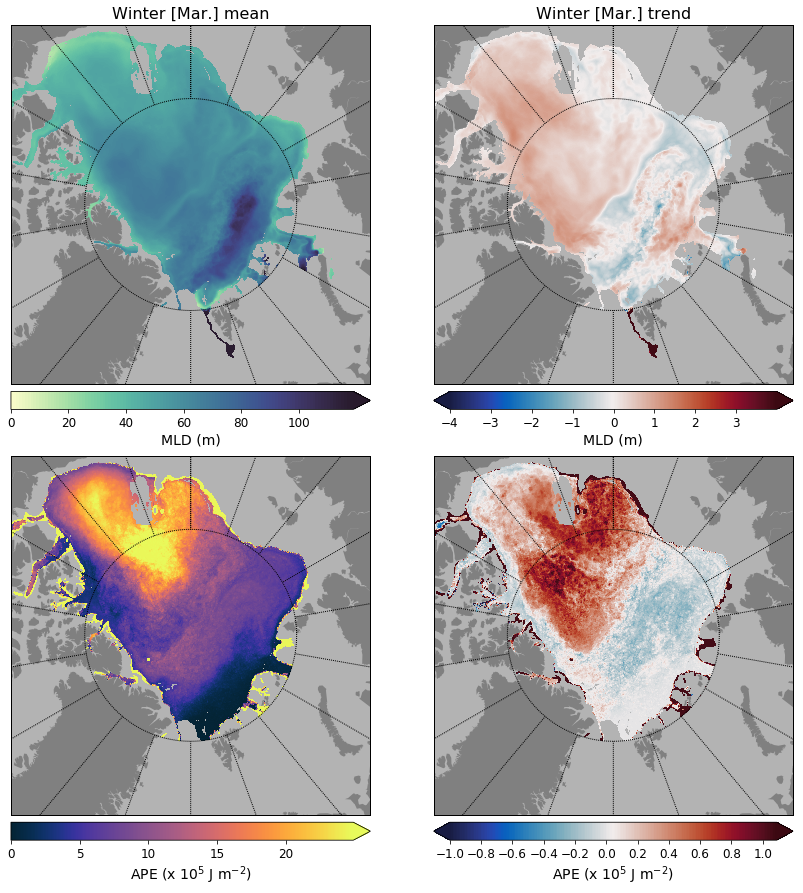

In [24]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

#MLD_sept_mean[MLD_sept_mean == 0] = np.nan
data = np.empty(np.shape(MLD_sept_mean))
data[:] = np.nan
data[ind_all]=MLD_sept_mean[ind_all]
data, elem_no_nan = pf.get_data(data,mesh,0)
ax1      = fig.add_subplot(221)
contours = np.arange(0, 120, 1)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.deep, extend='max')
label = 'MLD (m)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks = np.arange(0, 120, 20))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Winter [Mar.] mean', fontsize=16)

#MLD_trend[MLD_trend == 0] = np.nan
data = np.empty(np.shape(MLD_trend))
data[:] = np.nan
data[ind_all]=MLD_trend[ind_all]
data2, elem_no_nan = pf.get_data(data,mesh,0) 
ax2      = fig.add_subplot(222)
contours = np.arange(-4, 4, .01)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'MLD (m)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks= np.arange(-4, 4.1, 1))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Winter [Mar.] trend', fontsize=16)

APE_sept_mean[APE_sept_mean == 0] = np.nan
data = np.empty(np.shape(APE_sept_mean))
data[:] = np.nan
data[ind_all]=APE_sept_mean[ind_all]/10**5
data, elem_no_nan = pf.get_data(data,mesh,0)
ax3      = fig.add_subplot(223)
contours = np.arange(0, 25, .1)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data , levels=contours, cmap=cmap.cm.thermal, extend='max')
label = 'APE (x 10$^{5}$ J m$^{-2}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=np.arange(0, 26, 5))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

APE_trend[APE_trend == 0] = np.nan
data = np.empty(np.shape(APE_trend))
data[:] = np.nan
data[ind_all]=APE_trend[ind_all]/10**5
data2, elem_no_nan = pf.get_data(data,mesh,0) 
ax4      = fig.add_subplot(224)
contours = np.arange(-1, 1.1, .01)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'APE (x 10$^{5}$ J m$^{-2}$)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=np.arange(-1, 1.1, .2))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

fig.subplots_adjust(wspace=0.02,hspace=0.12)

plt.savefig(save_path+'map_mldape_winter.png', dpi = 300, bbox_inches='tight') 

For depth 0 model level -0.0 will be used


Text(0.5,1,'Winter [Mar.] mean')

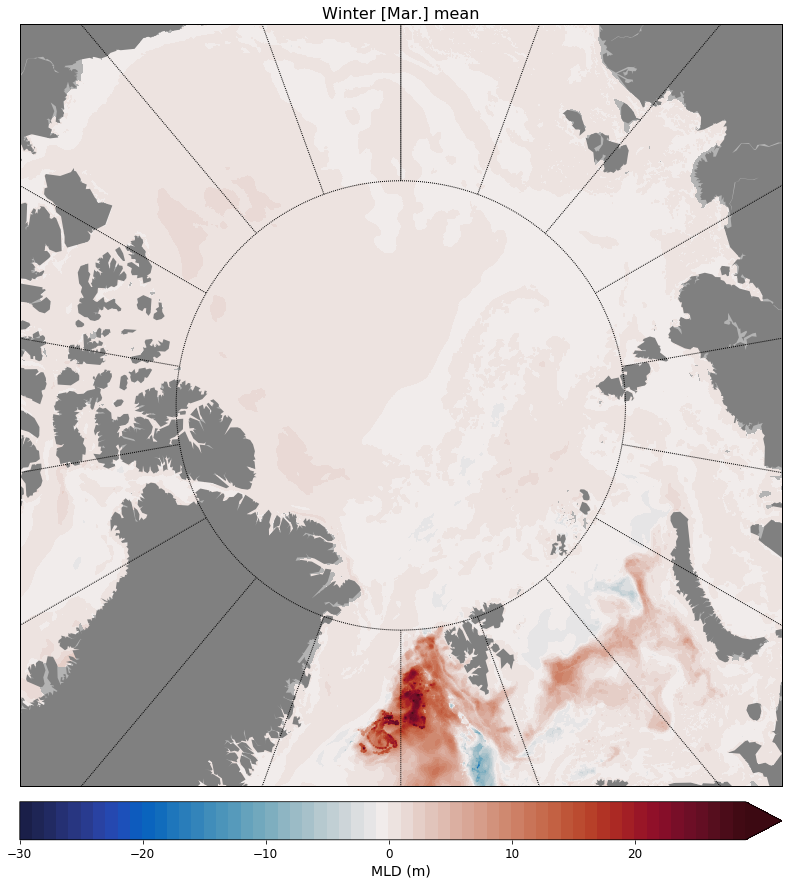

In [27]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
data, elem_no_nan = pf.get_data(MLD_trend,mesh,0)
ax1      = fig.add_subplot(111)
contours = np.arange(-30, 30, 1)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='max')
label = 'MLD (m)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks = np.arange(-30, 30, 10))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Winter [Mar.] mean', fontsize=16)
